# The Great American Coffee Taste Test

This week's question: Do you think participants in this survey are representative of Americans in general?

In [1]:
# Load typical libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the data
coffee_survey = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-05-14/coffee_survey.csv')



In [3]:
# look at the data
coffee_survey.head()

,submission_id,age,cups,where_drink,brew,brew_other,purchase,purchase_other,favorite,favorite_specify,...,spent_equipment,value_equipment,gender,gender_specify,education_level,ethnicity_race,ethnicity_race_specify,employment_status,number_children,political_affiliation
0,gMR29l,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,Regular drip coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BkPN0e,25-34 years old,NaN,NaN,Pod/capsule machine (e.g. Keurig/Nespresso),NaN,NaN,NaN,Iced coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W5G8jj,25-34 years old,NaN,NaN,Bean-to-cup machine,NaN,NaN,NaN,Regular drip coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4xWgGr,35-44 years old,NaN,NaN,Coffee brewing machine (e.g. Mr. Coffee),NaN,NaN,NaN,Iced coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QD27Q8,25-34 years old,NaN,NaN,Pour over,NaN,NaN,NaN,Latte,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
coffee_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   submission_id                 4042 non-null   object 
 1   age                           4011 non-null   object 
 2   cups                          3949 non-null   object 
 3   where_drink                   3972 non-null   object 
 4   brew                          3657 non-null   object 
 5   brew_other                    678 non-null    object 
 6   purchase                      710 non-null    object 
 7   purchase_other                31 non-null     object 
 8   favorite                      3980 non-null   object 
 9   favorite_specify              114 non-null    object 
 10  additions                     3959 non-null   object 
 11  additions_other               48 non-null     object 
 12  dairy                         1686 non-null   object 
 13  swe

Initial observations:
- There are 4042 entries or observations
- No one answered all of the questions
- Age is the variable that has the fewest null values

In [5]:
# Is there a way to look at all the unique values in all the fields all at once? Would I want to do that? No. No I do not.
# It was a good exercise, though. 

# for column in coffee_survey.columns:
#     print(f"Unique values in {column}: {coffee_survey[column].unique()}")

In [6]:
# Let's try looking at each column

unique_where_drink = pd.Series(coffee_survey['where_drink'].str.cat(sep=',').split(',')).str.strip().unique()
# The str.cat(sep=',') function concatenates all the strings in the 'where_drink' column, separated by commas. 
# The split(',') function then splits the concatenated string into individual phrases. 
# The str.strip() function is used to remove any leading or trailing whitespace from each phrase, and finally, 
# unique() finds all the unique phrases.

print(unique_where_drink)

['At a cafe' 'At the office' 'At home' 'On the go' 'None of these']


In [7]:
# Nice! Can I do that for all the columns?
for column in coffee_survey.columns:
    if coffee_survey[column].dtype == object:
        unique_phrases = pd.Series(coffee_survey[column].str.cat(sep=',').split(',')).str.strip().unique()
        print(f"Unique values in {column}: {unique_phrases}")
    else:
        print(f"Numbers {column}")

Unique values in submission_id: ['gMR29l' 'BkPN0e' 'W5G8jj' ... 'g5ggRM' 'rlgbDN' '0EGYe9']
Unique values in age: ['18-24 years old' '25-34 years old' '35-44 years old' '55-64 years old'
 '<18 years old' '>65 years old' '45-54 years old']
Unique values in cups: ['Less than 1' '2' '1' '3' 'More than 4' '4']
Unique values in where_drink: ['At a cafe' 'At the office' 'At home' 'On the go' 'None of these']
Unique values in brew: ['Pod/capsule machine (e.g. Keurig/Nespresso)' 'Bean-to-cup machine'
 'Coffee brewing machine (e.g. Mr. Coffee)' 'Pour over' 'Espresso'
 'French press' 'Instant coffee' 'Other' 'Coffee extract (e.g. Cometeer)'
 'Cold brew']
Unique values in brew_other: ['Aeropress' 'Mokkapot' 'Moka pot' 'moka pot.' 'Areopress' 'Mokapot'
 'aeropress' 'Clever' 'moka pot' 'Immersion (Clever' 'Aeropress)'
 'Clever dripper' 'Drip' 'Immersion (aeropress)' 'Aero press'
 'Hario Switch' 'Syphone' 'Cometeer!' 'clever'
 'Steep-and-release (Clever dripper)' 'Moka Pot (which is not espresso!!)'

Further observations:
- There are a lot of ways to spell Moka Pot! If I were to explore the fields that have uncontrolled answers (what's a better term for that?) I would at the very least put the answers in all lowercase. There's more cleanup I could do with picking out matching terms, but it's slightly beyond my capabilities right now, and not the focus of the question.
- I could compare the following to US census data (or other demographic data?):
    - age
    - income statistics, vs how much people are spending?
    - gender
    - education level
    - ethnicity/race
    - employment status
    - number of children
    - political affiliation

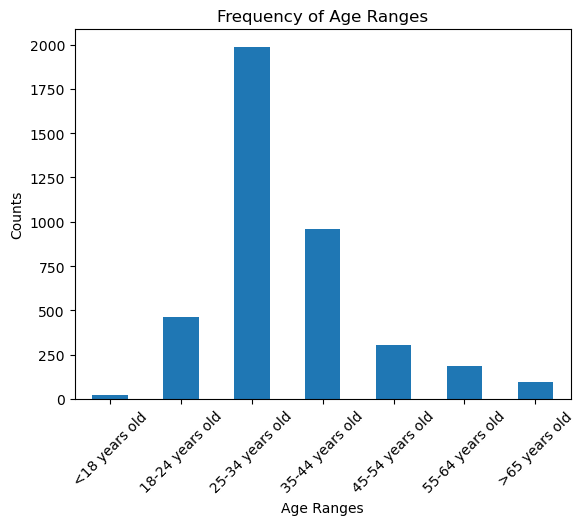

In [30]:
# Let's try age

custom_order = ['<18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old',
                '55-64 years old', '>65 years old'] 

age_counts = coffee_survey['age'].value_counts()

# plt.figure(figsize=(10, 6))
age_counts.loc[custom_order].plot(kind='bar')
plt.title('Frequency of Age Ranges')
plt.xlabel('Age Ranges')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

Look for US census age data. https://www.census.gov/data/tables/2023/demo/age-and-sex/2023-age-sex-composition.html
Found it. 

Cleaned it in Excel and whittled it down to the same age categories.

In [23]:
# can we get the census data in the same plot?
us_age = pd.read_csv('2023agesex_table1.csv')

In [24]:
us_age

,age,number
0,<18 years old,72500
1,18-24 years old,30459
2,25-34 years old,44914
3,35-44 years old,43487
4,45-54 years old,40002
5,55-64 years old,41387
6,>65 years old,57884


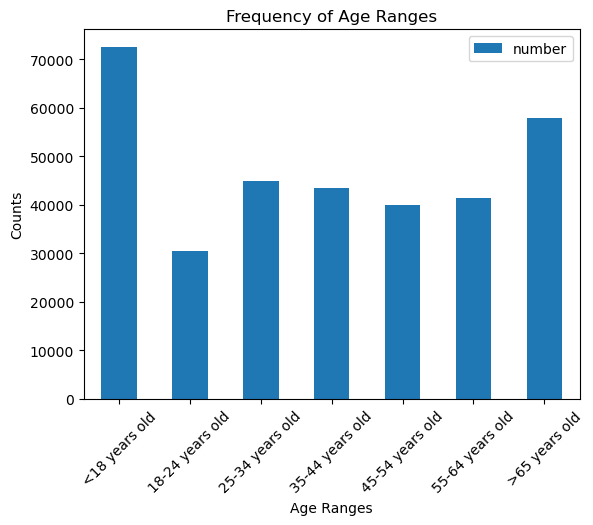

In [31]:
plot_df = us_age.set_index('age')

# plt.figure(figsize=(10, 6))
plot_df.plot(kind='bar')
plt.title('Frequency of Age Ranges')
plt.xlabel('Age Ranges')
plt.ylabel('Counts')
plt.xticks(rotation=45)

plt.show()

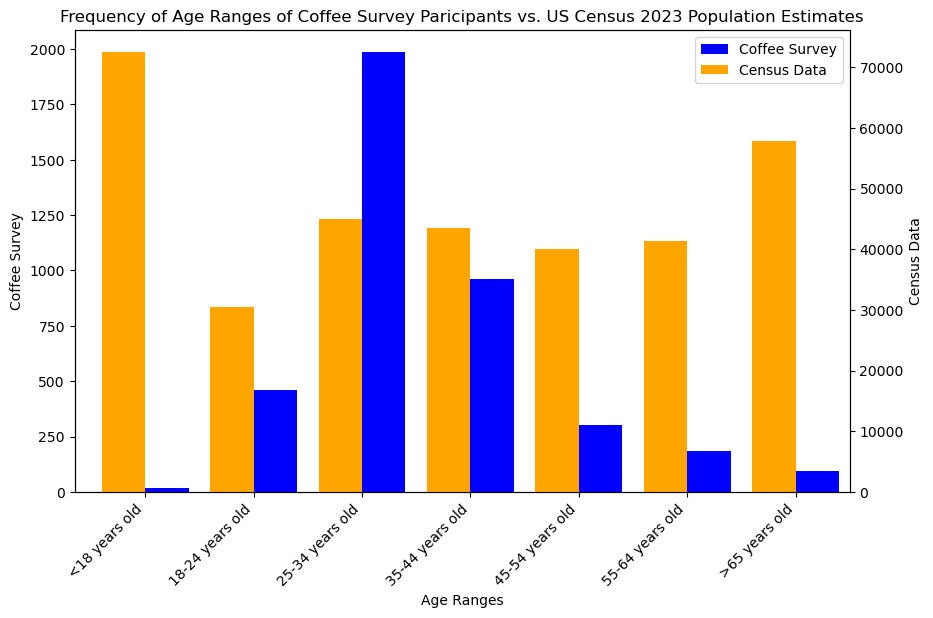

In [59]:
# Combine the charts

fig, ax1 = plt.subplots(figsize=(10, 6))

age_counts.loc[custom_order].plot(kind='bar', position=0, width=0.4, ax=ax1, color='blue', label='Coffee Survey')
ax2 = ax1.twinx()
plot_df['number'].plot(kind='bar', position=1, width=0.4, ax=ax2, color='orange', label='Census Data')
ax1.set_title('Frequency of Age Ranges of Coffee Survey Paricipants vs. US Census 2023 Population Estimates')
ax1.set_xlabel('Age Ranges')
ax1.set_ylabel('Coffee Survey')
ax2.set_ylabel('Census Data')
ax1.tick_params(axis='y')
ax2.tick_params(axis='y')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

ax1.set_xlim(left=None, right=len(age_counts.index) - 0.5)

plt.savefig('Rolling_Stone.png')

plt.show()

Yet more observations:
- There are far fewer people under 18 and over 65 that responded to the survey than are reflected in the general US population.
- It was a YouTube survey, so from what I understand it wasn't in person?  Maybe the respondants reflect usage of social media.
- The 25-34 age bracket was represented in greater proportion in the coffee survey than the general population.